In [143]:
import numpy as np
import networkx as nx
from numpy import genfromtxt
import matplotlib.pyplot as plt

In [144]:

class RGraph():
    def __init__(self, num_location, num_home, starting_location):
        self.num_location = num_location
        self.num_home = num_home
        self.starting_location = starting_location
        self.edge_matrix = np.zeros((self.num_location, self.num_location))
        self.visited = {}
        self.locations = [starting_location]

    def check_if_connected(self):
        return all([value for value in self.visited.values()])

    def dfs(self, i):
        self.visited[i] = True
        for j in range(self.num_location):
            if self.edge_matrix[i][j] != 0 and not self.visited[j]:
                self.dfs(j)


    def generate_random_edge(self):
        return np.around(np.random.uniform(500000000,1000000000), 5)
    def random_input_generator(self):

        p1 = 0.8
        p2 = 0.8
        p3 = 1
        for i in range(self.num_location-1):
            self.locations.append("location{}".format(i+1))

        for i in range(self.num_location):
            for j in range(self.num_location):
                if j > i or i == j :
                    continue
                if np.random.uniform(0,1) < p1:
                    if np.random.uniform(0,1) < p2:
                        rand_num = self.generate_random_edge()
                        self.edge_matrix[i][j], self.edge_matrix[j][i] = rand_num, rand_num
                        if np.random.uniform(0,1) < p3:
                            indexi = round(np.random.uniform(0,self.num_location))
                            indexj = round(np.random.uniform(0,self.num_location))
                            self.edge_matrix[indexi-1][indexj-1], self.edge_matrix[indexj-1][indexi-1] = 0, 0

        # check if the graph is connected
        self.visited = dict([(i, False) for i in range(self.num_location)])
        self.dfs(0)
        if self.check_if_connected():
            print('connected')
        else:
            print('not connected')

        homes = self.locations.copy()[1:]
        np.random.shuffle(homes)

        self.generate_input(homes)

    def generate_input(self, homes):
        print(self.num_location)
        print(self.num_home)

        [print(v, end =  ' ') for v in self.locations]
        print()
        [print(h, end =  ' ') for h in homes[:self.num_home]]
        print()
        print(self.starting_location)
        for i in range(self.num_location):
            for j in range(self.num_location):
                if self.edge_matrix[i][j] == 0:
                    print("x", end = ' ')
                else:
                    print(str(self.edge_matrix[i][j]), end = ' ')
            print()
            
        

In [145]:
g = RGraph(100, 50, "Soda")
g.random_input_generator()

connected
100
50
Soda location1 location2 location3 location4 location5 location6 location7 location8 location9 location10 location11 location12 location13 location14 location15 location16 location17 location18 location19 location20 location21 location22 location23 location24 location25 location26 location27 location28 location29 location30 location31 location32 location33 location34 location35 location36 location37 location38 location39 location40 location41 location42 location43 location44 location45 location46 location47 location48 location49 location50 location51 location52 location53 location54 location55 location56 location57 location58 location59 location60 location61 location62 location63 location64 location65 location66 location67 location68 location69 location70 location71 location72 location73 location74 location75 location76 location77 location78 location79 location80 location81 location82 location83 location84 location85 location86 location87 location88 location89 location

x x x x 702520678.82273 514190044.17983 500277642.48537 x x 896226963.40936 503968656.36004 x 505043512.81167 610017397.94503 x 665434101.32516 x 626418691.27624 x x x x x x 681310342.33313 x x x 872160564.89043 730188148.34452 732548268.02885 858489056.7898 700764001.10848 917037350.43619 x x 900468429.298 x 546802967.01861 x x x x x 512063038.53977 x x 592482014.67168 x 527406284.18899 510035933.34463 x x x 625158546.75941 x x x x 538238543.36811 787550362.77278 905889512.18063 956924980.76689 x x x x x x x 592928748.10025 x x x x 824023355.42227 x 515925723.90573 x x x 691736450.71035 x x 560058150.31435 523528740.54825 508643289.78234 851328467.3099 x 603047732.70382 922437916.03321 749829010.31876 941088844.71954 772574453.18692 x x 726842162.29577 x 858903842.90495 723877425.55082 
x x x x 820615041.88745 x 510424259.4471 811019106.37582 x x 772373292.71837 x x 507241578.92437 x x x 740594099.89244 888282248.54455 x 513941590.5309 x 880052827.7361 x x x x 550479564.48872 x x 6890

x x x x x x 794768338.54531 960361150.21482 774116247.81203 x x x 760761084.80795 x 810962800.94205 572336074.75587 846465286.93717 x 790273867.17826 934601479.26574 788913888.18864 x x x 815602446.1887 510035933.34463 832991171.73732 803197525.04546 x x x x x 620975284.04087 x x 697098265.00142 x 538789885.46987 x x 503593829.73772 740307123.5856 543355158.83209 x x x x 632176361.70283 x x 944393958.2237 x x 652226494.94851 568217332.08996 766907112.98793 x x x 535173487.86795 x x x x x 620083315.51314 x x x x 579356210.86852 679530348.94408 x x x 713190125.34042 x 515403298.37987 609068084.16736 947154700.10018 598166442.0619 x 997086405.48137 x x 571235287.35656 696560513.85084 719599767.3001 834680368.90563 x 644859582.7307 936147995.02847 725138328.88181 787124687.3503 573162989.59465 x 817046505.25736 x 722439195.5641 
708253601.58225 x 908547274.92307 600126494.96769 x x x x 772775363.15261 x x 730739014.4034 538152610.3932 x 741831626.85043 x x x x 933608650.52299 873786762.439

695458870.37772 x 753173586.71645 x x x 981291454.00127 x x 802868706.5894 535675932.08432 581342467.73561 683940654.51379 x x 650949391.44735 552850995.89052 792237459.12109 952426010.30129 x 610841771.06649 x x x 828952138.73897 824023355.42227 x 508054010.06808 x 648521498.47252 x x 966754329.46024 x x x x 833759015.89447 810244539.1513 872402358.14644 x 757824313.67455 x 580497797.98102 x x 820299203.57886 x 891162536.20999 671834637.59694 x x x x 943136822.37504 x x x x 721715803.50414 x 916363210.12528 676471809.19405 x x 999483665.5034 x x 753621771.29445 x 933561659.02927 503456828.42692 x x x x 796794866.6128 x x 758014033.52307 x x x 791549607.56307 x x 503706248.55916 959921907.73929 520046336.9306 x x x 847106419.20354 616515563.65235 x x x x x 771764814.13385 
x x 895751779.47979 x 614328305.19472 x 884652513.34746 986730004.30186 x x x x 612884830.635 x 580935950.29348 719582269.34628 532529957.27953 x 594722156.20789 x 897135222.03016 563258923.96465 973985718.07115 5041

{0: 'Soda', 1: 'location1', 2: 'location2', 3: 'location3', 4: 'location4', 5: 'location5', 6: 'location6', 7: 'location7', 8: 'location8', 9: 'location9', 10: 'location10', 11: 'location11', 12: 'location12', 13: 'location13', 14: 'location14', 15: 'location15', 16: 'location16', 17: 'location17', 18: 'location18', 19: 'location19', 20: 'location20', 21: 'location21', 22: 'location22', 23: 'location23', 24: 'location24', 25: 'location25', 26: 'location26', 27: 'location27', 28: 'location28', 29: 'location29', 30: 'location30', 31: 'location31', 32: 'location32', 33: 'location33', 34: 'location34', 35: 'location35', 36: 'location36', 37: 'location37', 38: 'location38', 39: 'location39', 40: 'location40', 41: 'location41', 42: 'location42', 43: 'location43', 44: 'location44', 45: 'location45', 46: 'location46', 47: 'location47', 48: 'location48', 49: 'location49', 50: 'location50', 51: 'location51', 52: 'location52', 53: 'location53', 54: 'location54', 55: 'location55', 56: 'location56'

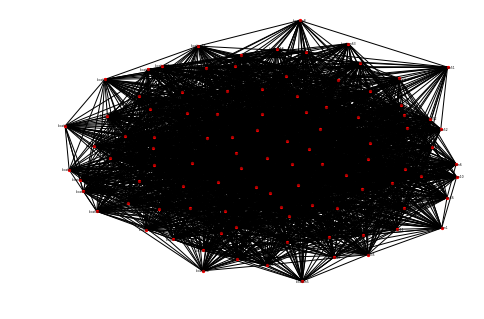

[[0.00000000e+00 0.00000000e+00 0.00000000e+00 ... 5.86809736e+08
  6.66999059e+08 7.25337462e+08]
 [0.00000000e+00 0.00000000e+00 8.88970481e+08 ... 7.05547999e+08
  0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 8.88970481e+08 0.00000000e+00 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 ...
 [5.86809736e+08 7.05547999e+08 0.00000000e+00 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 [6.66999059e+08 0.00000000e+00 0.00000000e+00 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 [7.25337462e+08 0.00000000e+00 0.00000000e+00 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]]


In [146]:
def show_graph(adjacency_matrix, locations):
    labeldict = {i:label for i, label in enumerate(locations)}
    print(labeldict)
    rows, cols = np.where(adjacency_matrix != 0)
    edges = zip(rows.tolist(), cols.tolist())
    gr = nx.Graph()
    gr.add_edges_from(edges)
    nx.draw(gr, node_size=5, labels=labeldict, with_labels = True, font_size=3)
    plt.show()

show_graph(g.edge_matrix, g.locations)
print(g.edge_matrix)